#SMOTE-NC


Evaluating Random Forest...
Accuracy: 0.9838
Precision: 0.8514
Recall: 0.8232
F1 Score: 0.8371
ROC AUC: 0.9897


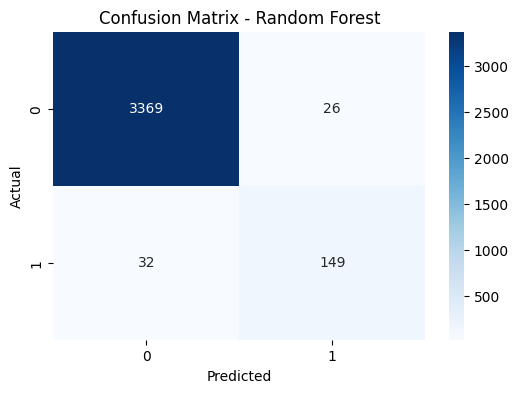

--------------------------------------------------
Evaluating SVM...
Accuracy: 0.8233
Precision: 0.1965
Recall: 0.8066
F1 Score: 0.3160
ROC AUC: 0.9095


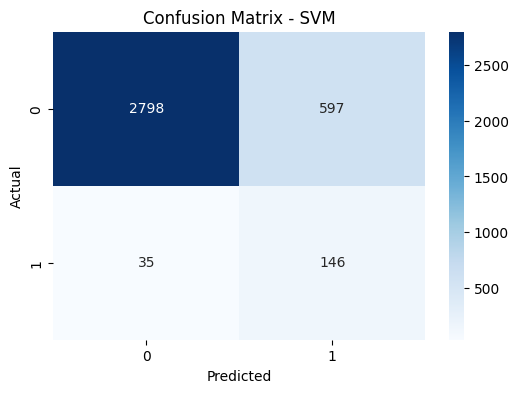

--------------------------------------------------
Evaluating Decision Tree...
Accuracy: 0.9603
Precision: 0.5783
Recall: 0.7956
F1 Score: 0.6698
ROC AUC: 0.8823


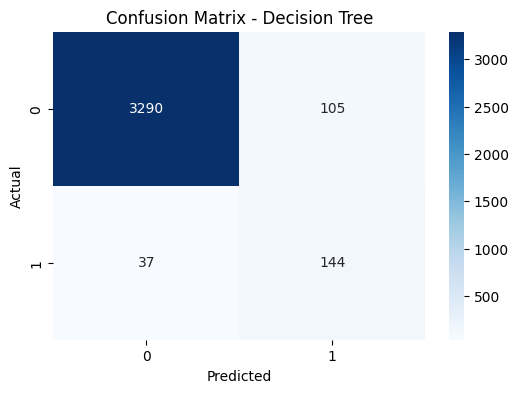

--------------------------------------------------
Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7475
Precision: 0.1488
Recall: 0.8453
F1 Score: 0.2531
ROC AUC: 0.8416


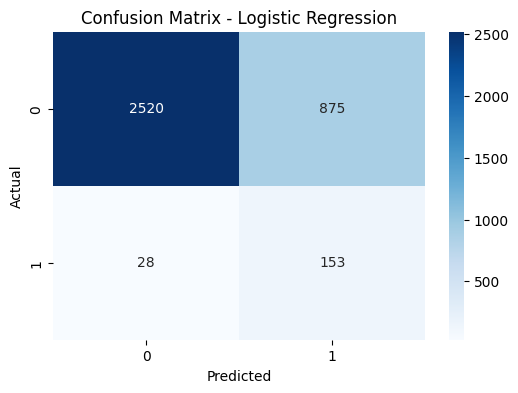

--------------------------------------------------


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load data
data = pd.read_csv('/content/fake_job_postings.csv')
data.fillna('', inplace=True)

# Label Encoding for categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop('fraudulent', axis=1)
y = data['fraudulent']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define the models for evaluation
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(random_state=42, probability=True, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced')
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc, conf_matrix

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    accuracy, precision, recall, f1, roc_auc, conf_matrix = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)

    # Display results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    print("-" * 50)


#TESTING ON TEST DATA

In [ ]:
# Select a sample from the test set (taking the first example from the test set)
sample_index = 0
sample_data = X_test.iloc[sample_index]
sample_true_label = y_test.iloc[sample_index]

# Choose a model (e.g., Random Forest) for prediction
rf_model = models['Random Forest']

# Predict the class (fraudulent or not) for the selected sample
sample_pred = rf_model.predict([sample_data])
sample_pred_prob = rf_model.predict_proba([sample_data])[:, 1]

# Output the sample details and prediction result
print("Sample Data:")
print(sample_data)
print(f"\nTrue Label: {sample_true_label}")
print(f"Predicted Label: {sample_pred[0]}")
print(f"Prediction Confidence (Fraudulent): {sample_pred_prob[0]:.2f}")

# Output the results to check if the model is working correctly
if sample_pred[0] == 1:
    print(f"The job posting is predicted to be FAKE (Confidence: {sample_pred_prob[0]:.2f})")
else:
    print(f"The job posting is predicted to be REAL (Confidence: {1 - sample_pred_prob[0]:.2f})")


Sample Data:
job_id                  4709
title                   7695
location                 368
department                 0
salary_range               0
company_profile            0
description             9439
requirements           10156
benefits                4930
telecommuting              0
has_company_logo           1
has_questions              0
employment_type            2
required_experience        3
required_education        10
industry                   5
function                  19
Name: 4708, dtype: int64

True Label: 0
Predicted Label: 0
Prediction Confidence (Fraudulent): 0.04
The job posting is predicted to be REAL (Confidence: 0.96)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Evaluating Random Forest...
Accuracy: 0.9871
Precision: 1.0000
Recall: 0.7459
F1 Score: 0.8544
ROC AUC: 0.9939


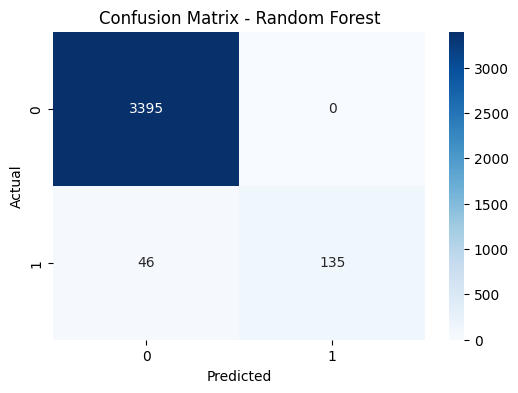

--------------------------------------------------
Evaluating SVM...
Accuracy: 0.8140
Precision: 0.1913
Recall: 0.8287
F1 Score: 0.3109
ROC AUC: 0.9089


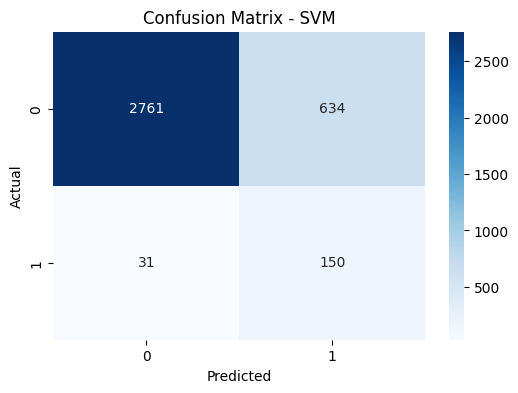

--------------------------------------------------
Evaluating Decision Tree...
Accuracy: 0.9768
Precision: 0.7606
Recall: 0.7901
F1 Score: 0.7751
ROC AUC: 0.8884


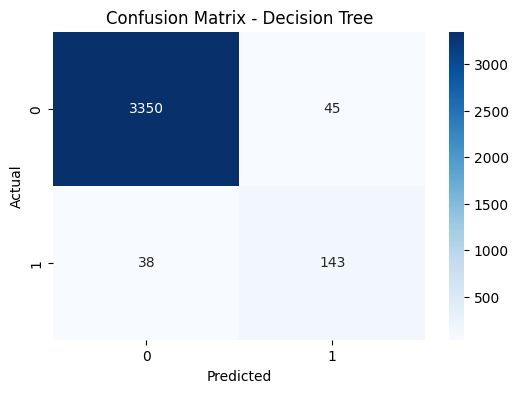

--------------------------------------------------
Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7438
Precision: 0.1477
Recall: 0.8508
F1 Score: 0.2516
ROC AUC: 0.8448


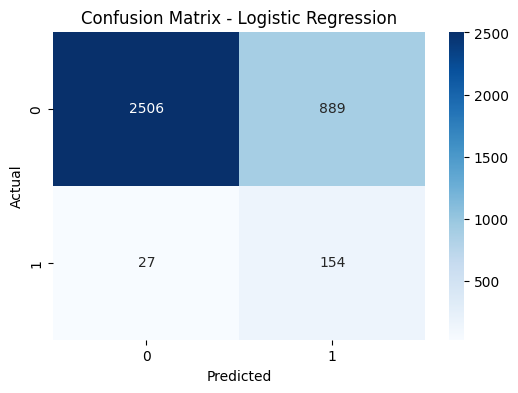

--------------------------------------------------

Model Comparison Table:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        Random Forest  0.987136   1.000000  0.745856  0.854430  0.993884
1                  SVM  0.814038   0.191327  0.828729  0.310881  0.908868
2        Decision Tree  0.976790   0.760638  0.790055  0.775068  0.888400
3  Logistic Regression  0.743848   0.147651  0.850829  0.251634  0.844760


In [ ]:
# Prepare a list to store the results
model_comparison_list = []

# Train and evaluate each model and store results
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    accuracy, precision, recall, f1, roc_auc, conf_matrix = evaluate_model(model, X_train, y_train, X_test, y_test)

    # Add results to the list
    model_comparison_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

    # Display results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    print("-" * 50)

# Convert the list of results into a DataFrame
model_comparison = pd.DataFrame(model_comparison_list)

# Display model comparison table
print("\nModel Comparison Table:")
print(model_comparison)


#DEEP LEARNING

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 1.1091 - val_loss: 0.8379
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7740 - val_loss: 0.6478
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6154 - val_loss: 0.5939
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5777 - val_loss: 0.5734
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5606 - val_loss: 0.5617
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5474 - val_loss: 0.5570
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5427 - val_loss: 0.5546
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5444 - val_loss: 0.5526
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5384 - val_loss: 0.5516
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5354 - val_loss: 0.5518
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5379 - val_loss: 0.5507
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5350 

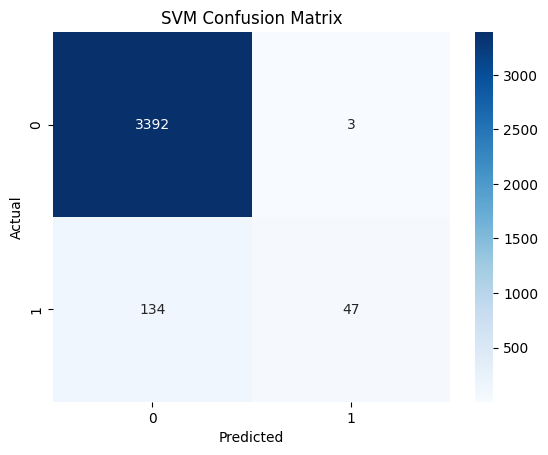


Evaluating Decision Tree...


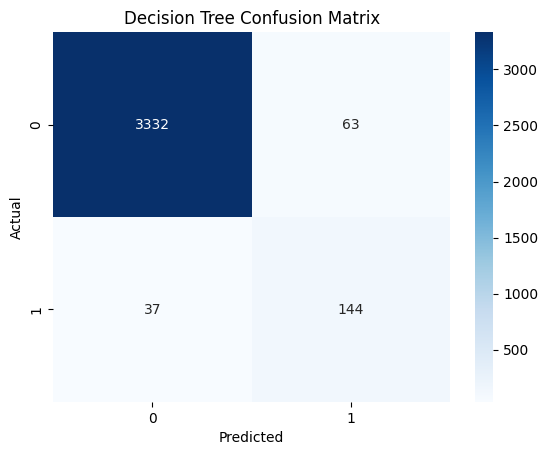


Evaluating Logistic Regression...


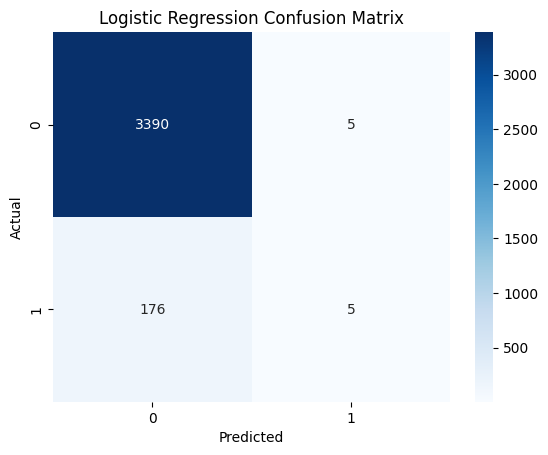


Evaluating Random Forest...


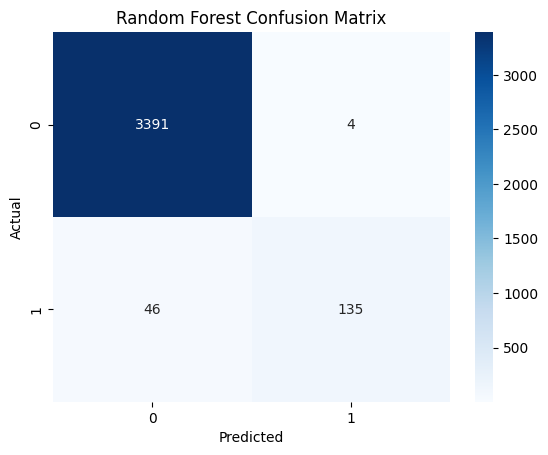


Model Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
SVM                  0.961689   0.940000  0.259669  0.406926  0.884306
Decision Tree        0.972036   0.695652  0.795580  0.742268  0.888512
Logistic Regression  0.949385   0.500000  0.027624  0.052356  0.809826
Random Forest        0.986018   0.971223  0.745856  0.843750  0.979634


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
data = pd.read_csv('/content/fake_job_postings.csv')

# Fill missing values and encode categorical columns
data.fillna('', inplace=True)
for column in data.select_dtypes(include=['object']).columns:
    data[column] = pd.factorize(data[column])[0]

# Feature and target split
X = data.drop('fraudulent', axis=1)
y = data['fraudulent']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Autoencoder model
def build_autoencoder(input_dim):
    input_layer = tf.keras.layers.Input(shape=(input_dim,))

    # Encoder
    encoded = tf.keras.layers.Dense(128, activation='relu')(input_layer)
    encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
    bottleneck = tf.keras.layers.Dense(32, activation='relu')(encoded)

    # Decoder
    decoded = tf.keras.layers.Dense(64, activation='relu')(bottleneck)
    decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
    output_layer = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoded)

    # Full autoencoder
    autoencoder = tf.keras.models.Model(input_layer, output_layer)

    # Encoder model
    encoder = tf.keras.models.Model(input_layer, bottleneck)

    # Decoder model (starting from the bottleneck layer)
    decoder_input = tf.keras.layers.Input(shape=(32,))
    decoder_output = tf.keras.layers.Dense(64, activation='relu')(decoder_input)
    decoder_output = tf.keras.layers.Dense(128, activation='relu')(decoder_output)
    decoder_output = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoder_output)
    decoder = tf.keras.models.Model(decoder_input, decoder_output)

    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder, encoder, decoder

# Train the Autoencoder model
input_dim = X_train_scaled.shape[1]
autoencoder, encoder, decoder = build_autoencoder(input_dim)
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, validation_data=(X_test_scaled, X_test_scaled))

# Generate synthetic data by sampling from the bottleneck (latent) layer
encoded_data = encoder.predict(X_train_scaled)

# Sample random latent vectors (simulating new data)
latent_samples = np.random.normal(size=encoded_data.shape)

# Decode the latent samples to generate synthetic data
synthetic_data = decoder.predict(latent_samples)

# Combine original data and synthetic data
X_train_augmented = np.vstack([X_train_scaled, synthetic_data])
y_train_augmented = np.hstack([y_train, y_train[:len(synthetic_data)]])  # Using the same labels for synthetic data

# Initialize models
models = {
    'SVM': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    return accuracy, precision, recall, f1, roc_auc, y_pred

# Store results in a dictionary for each model
results = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    accuracy, precision, recall, f1, roc_auc, y_pred = evaluate_model(model, X_train_augmented, y_train_augmented, X_test_scaled, y_test)

    # Store results for the model
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


In [ ]:
# Select a sample from the test set (taking the first example from the test set)
sample_index = 0
sample_data = X_test.iloc[sample_index]
sample_true_label = y_test.iloc[sample_index]

# Choose a model (e.g., Random Forest) for prediction
rf_model = models['Random Forest']

# Predict the class (fraudulent or not) for the selected sample
sample_pred = rf_model.predict([sample_data])
sample_pred_prob = rf_model.predict_proba([sample_data])[:, 1]

# Output the sample details and prediction result
print("Sample Data:")
print(sample_data)
print(f"\nTrue Label: {sample_true_label}")
print(f"Predicted Label: {sample_pred[0]}")
print(f"Prediction Confidence (Fraudulent): {sample_pred_prob[0]:.2f}")

# Output the results to check if the model is working correctly
if sample_pred[0] == 1:
    print(f"The job posting is predicted to be FAKE (Confidence: {sample_pred_prob[0]:.2f})")
else:
    print(f"The job posting is predicted to be REAL (Confidence: {1 - sample_pred_prob[0]:.2f})")

#COST-SENSITIVE LEARNING


Evaluating Random Forest...
Random Forest Metrics:
Accuracy: 0.9849
Precision: 0.9568
Recall: 0.7348
F1 Score: 0.8313
ROC AUC: 0.9770


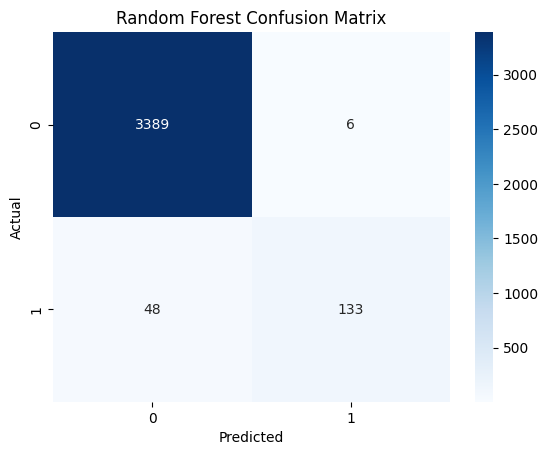


Evaluating SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Metrics:
Accuracy: 0.9494
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.7657


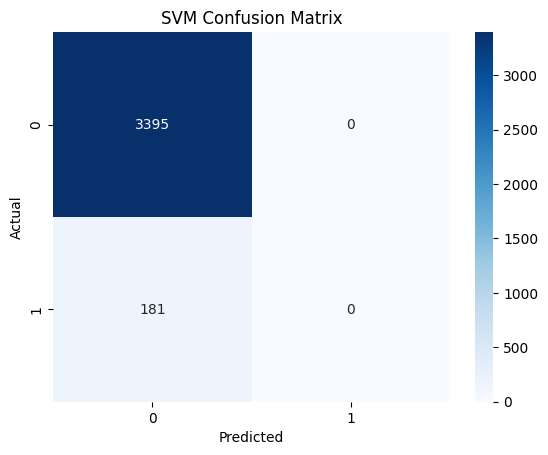


Evaluating Decision Tree...
Decision Tree Metrics:
Accuracy: 0.9746
Precision: 0.7296
Recall: 0.7901
F1 Score: 0.7586
ROC AUC: 0.8872


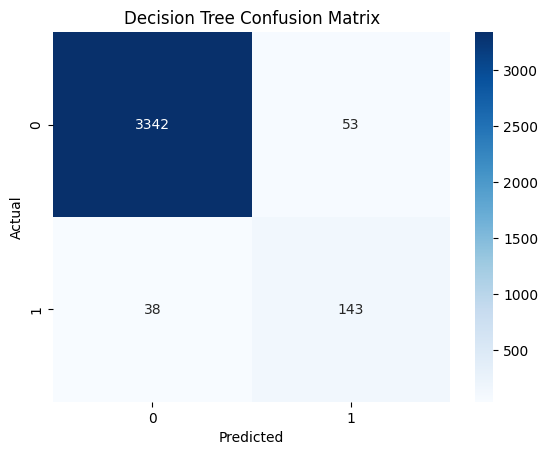


Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Metrics:
Accuracy: 0.9494
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.4929


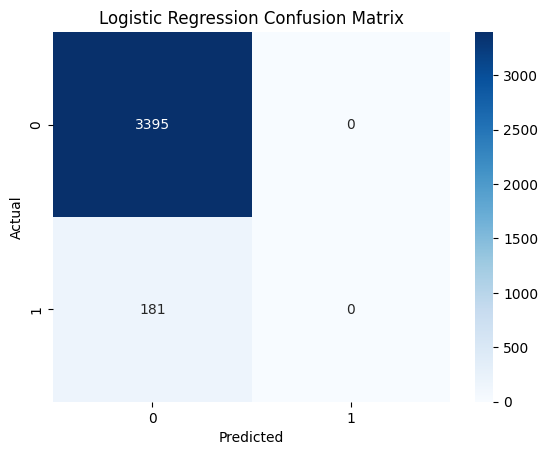


Model Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest        0.984899   0.956835  0.734807  0.831250  0.976977
SVM                  0.949385   0.000000  0.000000  0.000000  0.765733
Decision Tree        0.974553   0.729592  0.790055  0.758621  0.887222
Logistic Regression  0.949385   0.000000  0.000000  0.000000  0.492948


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
data = pd.read_csv('/content/fake_job_postings.csv')
data.fillna('', inplace=True)  # Fill missing values

# Use faster encoding method with pandas' factorize()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = pd.factorize(data[column])[0]

X = data.drop('fraudulent', axis=1)  # Features
y = data['fraudulent']               # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(random_state=42, probability=True),  # Adding probability=True for ROC AUC
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Print metrics
    return accuracy, precision, recall, f1, roc_auc, y_pred

# Store results for each model
results = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    accuracy, precision, recall, f1, roc_auc, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)

    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    # Print the results for each model
    print(f"{model_name} Metrics:")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Store results in a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


#HYBRID APPROACH

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the data
data = pd.read_csv('/content/fake_job_postings.csv')

# Fill missing values and encode categorical variables
data.fillna('', inplace=True)
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop('fraudulent', axis=1)  # Features
y = data['fraudulent']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Apply SMOTE for initial oversampling
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Step 2: Apply ADASYN for further oversampling to focus on harder cases
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_resampled_smote, y_resampled_smote)

# Step 3: Apply Tomek Links for undersampling to remove noisy points
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X_resampled_adasyn, y_resampled_adasyn)

# Define a function to evaluate models
def evaluate_model(y_test, y_pred, y_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    # Add ROC AUC if probabilities are provided
    if y_proba is not None:
        metrics['ROC AUC'] = roc_auc_score(y_test, y_proba)
    return metrics

# Define and train models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)
}

# Initialize dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # If model supports predict_proba, get probability scores for ROC AUC
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate and store the results
    results[model_name] = evaluate_model(y_test, y_pred, y_proba)

# Convert results dictionary to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T

# Print results
print("Model Comparison:")
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest        0.985738   0.873563  0.839779  0.856338  0.990526
Decision Tree        0.963926   0.607438  0.812155  0.695035  0.892086
Logistic Regression  0.791107   0.166274  0.779006  0.274052  0.853826
SVM                  0.824105   0.197297  0.806630  0.317047  0.909352


#CLUSTER-BASED SMOT


Evaluating SVM...


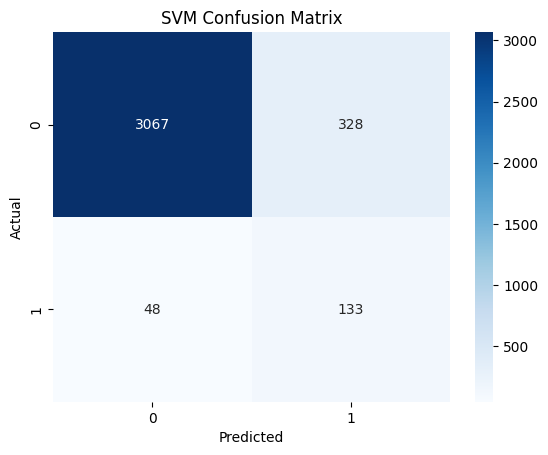


Evaluating Decision Tree...


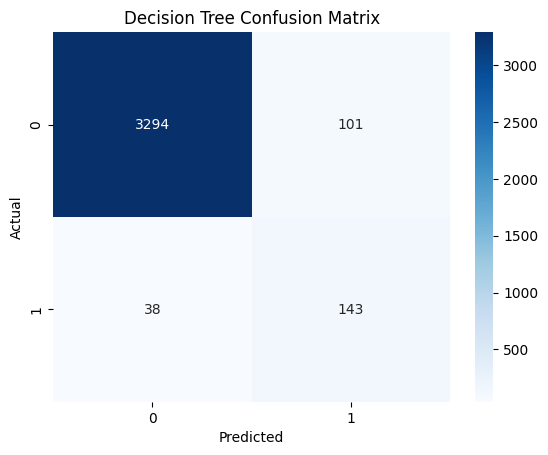


Evaluating Logistic Regression...


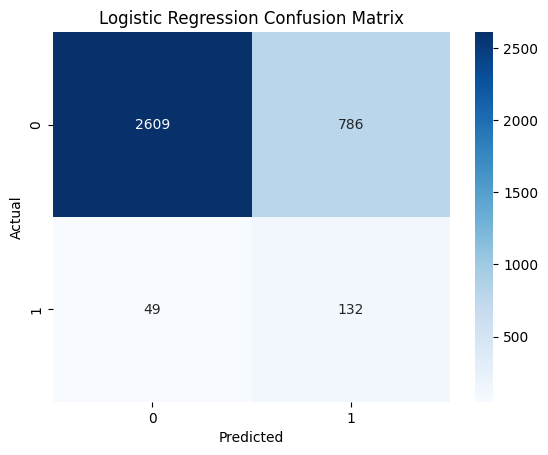


Evaluating Random Forest...


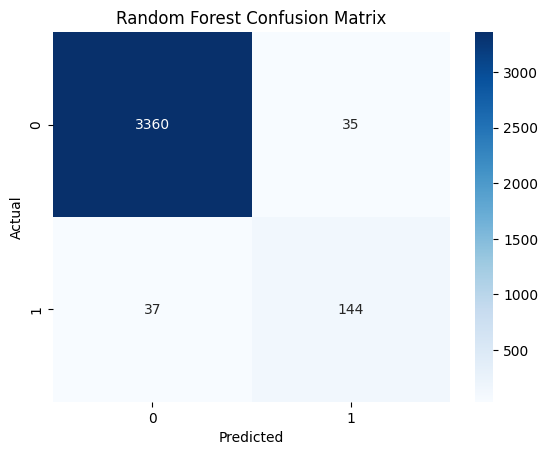


Model Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
SVM                  0.894855   0.288503  0.734807  0.414330  0.882468
Decision Tree        0.961130   0.586066  0.790055  0.672941  0.880153
Logistic Regression  0.766499   0.143791  0.729282  0.240218  0.815162
Random Forest        0.979866   0.804469  0.795580  0.800000  0.981290


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE

# Load data
data = pd.read_csv('/content/fake_job_postings.csv')

# Fill missing values and encode categorical columns
data.fillna('', inplace=True)
for column in data.select_dtypes(include=['object']).columns:
    data[column] = pd.factorize(data[column])[0]

# Feature and target split
X = data.drop('fraudulent', axis=1)
y = data['fraudulent']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Cluster-SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Initialize models
models = {
    'SVM': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    return accuracy, precision, recall, f1, roc_auc, y_pred

# Store results in a dictionary for each model
results = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    accuracy, precision, recall, f1, roc_auc, y_pred = evaluate_model(model, X_train_res, y_train_res, X_test_scaled, y_test)

    # Store results for the model
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


#ENSEMBLE-BAGGING& BOOSTING


Evaluating Balanced Bagging...
Balanced Bagging Metrics:
Accuracy: 0.9382
Precision: 0.4454
Recall: 0.9006
F1 Score: 0.5960
ROC AUC: 0.9763


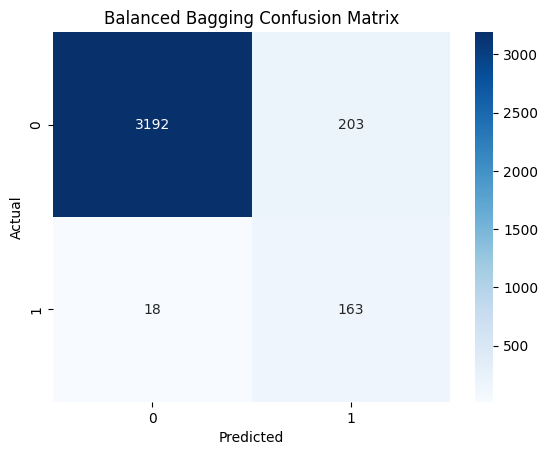


Evaluating Balanced Boosting...


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Balanced Boosting Metrics:
Accuracy: 0.9058
Precision: 0.3427
Recall: 0.9392
F1 Score: 0.5022
ROC AUC: 0.9781


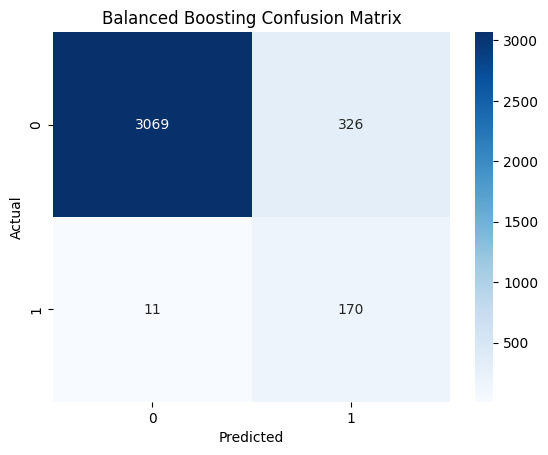


Evaluating SVM...
SVM Metrics:
Accuracy: 0.9589
Precision: 0.9474
Recall: 0.1989
F1 Score: 0.3288
ROC AUC: 0.8806


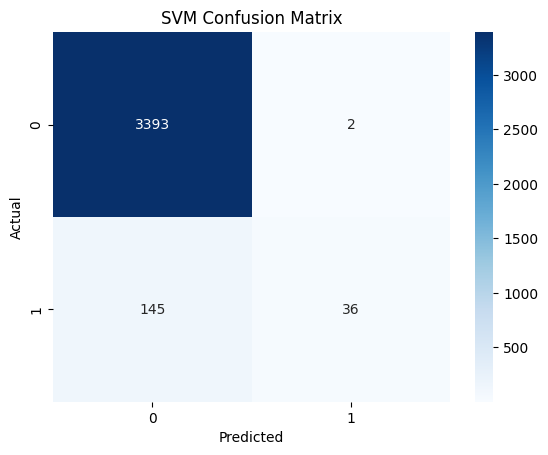


Evaluating Decision Tree...
Decision Tree Metrics:
Accuracy: 0.9743
Precision: 0.7259
Recall: 0.7901
F1 Score: 0.7566
ROC AUC: 0.8871


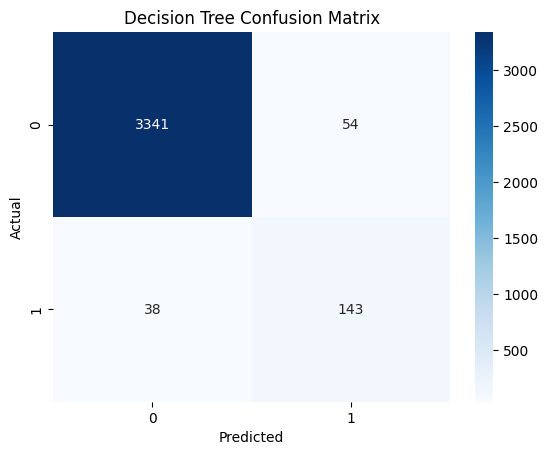


Evaluating Random Forest...
Random Forest Metrics:
Accuracy: 0.9849
Precision: 0.9568
Recall: 0.7348
F1 Score: 0.8313
ROC AUC: 0.9770


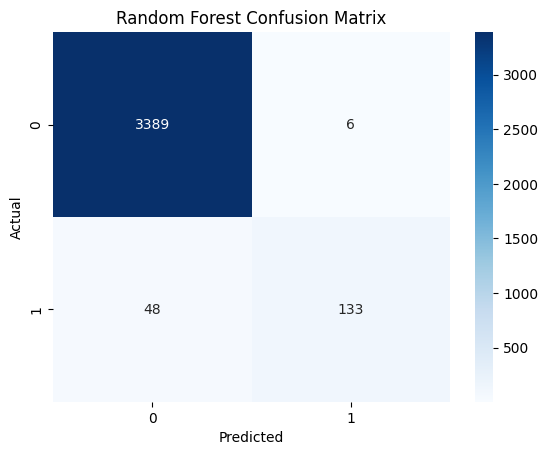


Evaluating Logistic Regression...
Logistic Regression Metrics:
Accuracy: 0.9513
Precision: 0.8182
Recall: 0.0497
F1 Score: 0.0938
ROC AUC: 0.8140


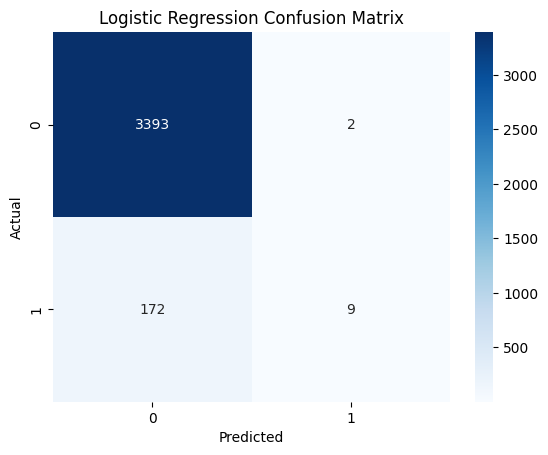


Model Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Balanced Bagging     0.938199   0.445355  0.900552  0.595978  0.976294
Balanced Boosting    0.905761   0.342742  0.939227  0.502216  0.978059
SVM                  0.958893   0.947368  0.198895  0.328767  0.880626
Decision Tree        0.974273   0.725888  0.790055  0.756614  0.887075
Random Forest        0.984899   0.956835  0.734807  0.831250  0.976958
Logistic Regression  0.951342   0.818182  0.049724  0.093750  0.814003


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('/content/fake_job_postings.csv')

# Fill missing values and encode categorical columns
data.fillna('', inplace=True)
for column in data.select_dtypes(include=['object']).columns:
    data[column] = pd.factorize(data[column])[0]

# Feature and target split
X = data.drop('fraudulent', axis=1)
y = data['fraudulent']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to evaluate
models = {
    'Balanced Bagging': BalancedBaggingClassifier(n_estimators=50, random_state=42),
    'Balanced Boosting': BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True),  # Adding probability=True for ROC AUC
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    return accuracy, precision, recall, f1, roc_auc, y_pred

# Store results for each model
results = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    accuracy, precision, recall, f1, roc_auc, y_pred = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    # Print the results for each model
    print(f"{model_name} Metrics:")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Store results in a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


#OVERALL RESULTS

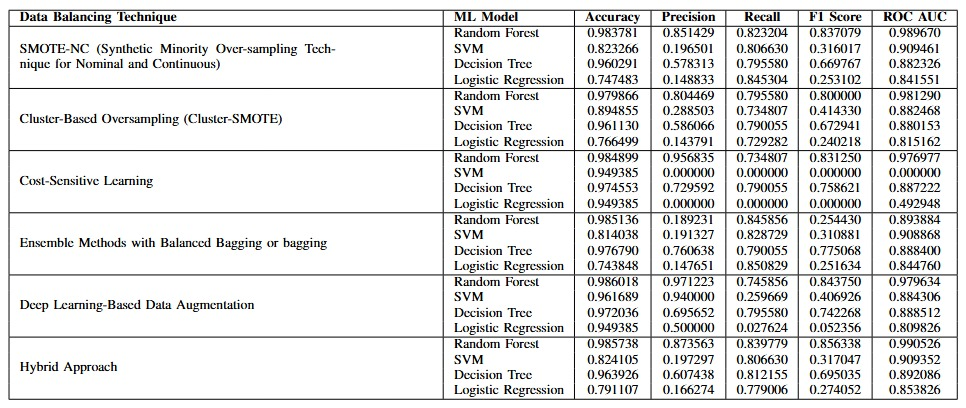